# Aula 03 - Seaborn

A biblioteca **seaborn** é baseada em **matplotlib**, e se integra, também, facilmanete a **pandas**. É muito utilizada para gerar visualizações estatísticas, principalmente durante **análises exploratórias de dados**, através de uma API de alto nível. 

Por padrão, a biblioteca já gera visualizações esteticamente bastante agradáveis.

**Leituras interessantes**

[Artigo científico da biblioteca](https://joss.theoj.org/papers/10.21105/joss.03021)

[Guia introdutório da biblioteca](https://seaborn.pydata.org/tutorial/introduction.html)

Alguns pontos para se ter em mente (destacados no próprio guia introdutório mencionado acima):

*While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.*

A biblioteca **seaborn** distingue entre funções a nível de **axes** e de **figure**. 

**Axes-level functions:** atuam no objeto *axes* do matplotlib, gerando plots contidos **apenas nos eixos**.

**Figure-level functions:** atuam no objeto *Figure* do matplotlib, gerando plots que compreendem **toda uma figura**.

**Facet grid:**

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


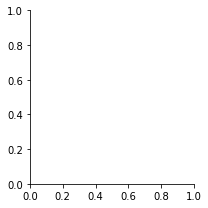

In [4]:
sns.FacetGrid(tips)

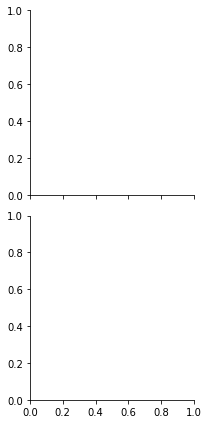

In [8]:
sns.FacetGrid(tips, row = "sex")

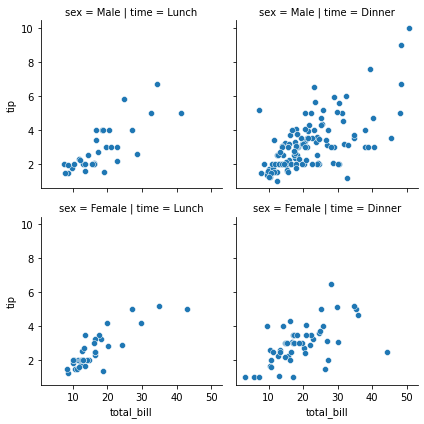

In [14]:
g = sns.FacetGrid(tips, row = "sex", col = "time")
g.map(sns.scatterplot, "total_bill", "tip")

A figura abaixo apresenta uma visão geral de alguns dos tipos de plot que conseguimos efetuar com a biblioteca **seaborn**.

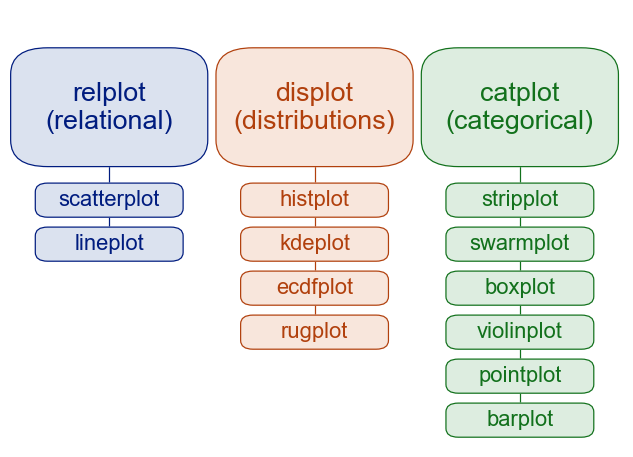

#### Alguns exemplos de plots

Ainda com o exemplo do dataset de combustíveis...

In [15]:
import pandas as pd
df = pd.read_csv('Datasets/gas_prices_brazil.tsv', sep='\t')

In [16]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


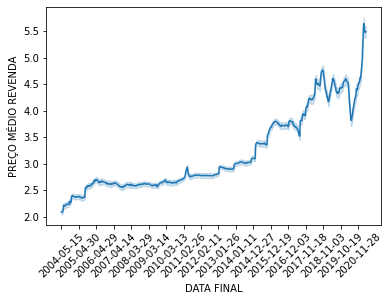

In [22]:
# Vamos plotar o preço médio de revenda da gasolina ao longo do tempo
import matplotlib.pyplot as plt

datas = list(df['DATA FINAL'].unique())
sns.lineplot(data = df[df['PRODUTO'] == 'GASOLINA COMUM'],
            x = 'DATA FINAL',
            y = 'PREÇO MÉDIO REVENDA')

plt.xticks(datas[::50], rotation = 45);

Vamos trabalhar, agora, com um dataset de [predição de acidente vascular cerebral (AVC)](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

In [23]:
df = pd.read_csv("Datasets/healthcare-dataset-stroke-data.csv")

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Gráfico de barras**

<AxesSubplot: xlabel='gender', ylabel='avg_glucose_level'>

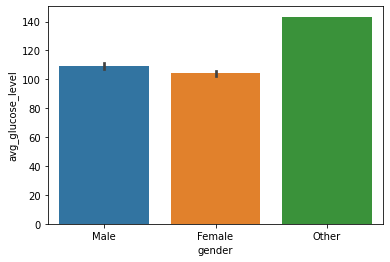

In [25]:
sns.barplot(data = df,
           x = 'gender',
           y = 'avg_glucose_level')

<AxesSubplot: xlabel='gender', ylabel='avg_glucose_level'>

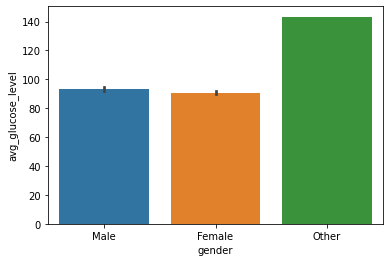

In [29]:
import numpy as np
sns.barplot(data = df,
           x = 'gender',
           y = 'avg_glucose_level',
           estimator = np.median)

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

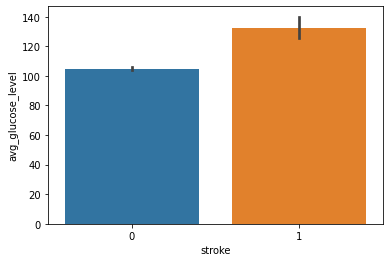

In [30]:
sns.barplot(data = df,
            x = 'stroke',
            y = 'avg_glucose_level'
)

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


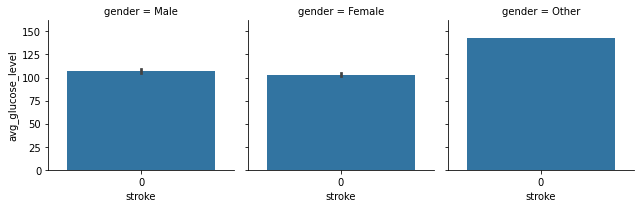

In [33]:
g = sns.FacetGrid(df, col = "gender")
g.map(sns.barplot, "stroke", "avg_glucose_level")

AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

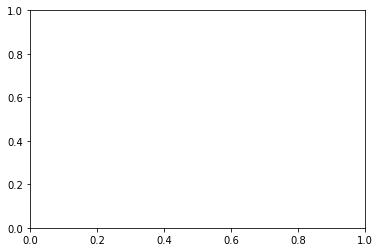

In [31]:
sns.barplot(data = df,
            x = 'stroke',
            y = 'avg_glucose_level',
            col = 'gender'
)

**Contagem de elementos**

<AxesSubplot: xlabel='gender', ylabel='count'>

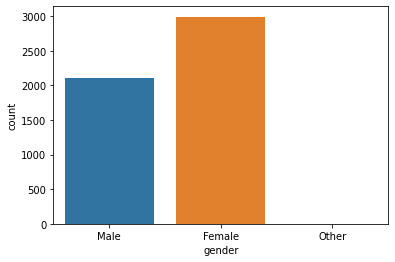

In [34]:
sns.countplot(data = df, x = 'gender')

<AxesSubplot: xlabel='stroke', ylabel='count'>

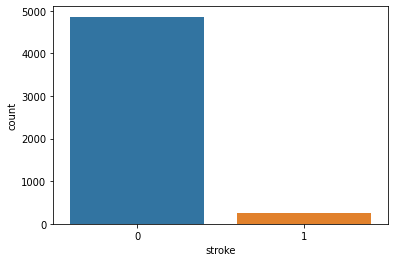

In [35]:
sns.countplot(data = df, x = 'stroke')

In [36]:
df.shape

(5110, 12)

In [41]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Vamos avaliar a distribuição de algumas variáveis

<AxesSubplot: xlabel='age', ylabel='Count'>

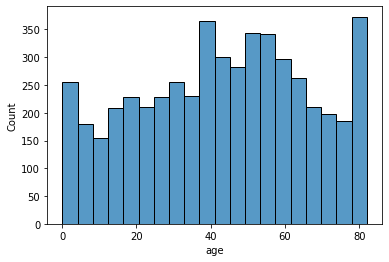

In [42]:
sns.histplot(df, x = 'age')

<AxesSubplot: xlabel='age', ylabel='Count'>

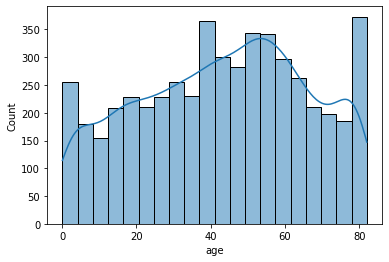

In [43]:
sns.histplot(df, x = 'age', kde = True)

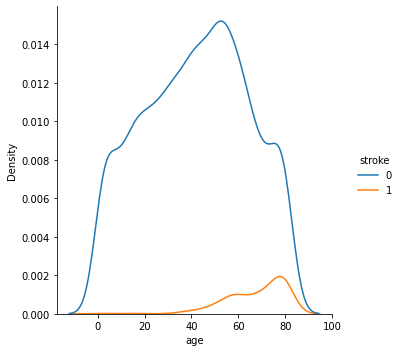

In [45]:
sns.displot(data = df,
           x = 'age',
           hue = 'stroke',
           kind = 'kde')

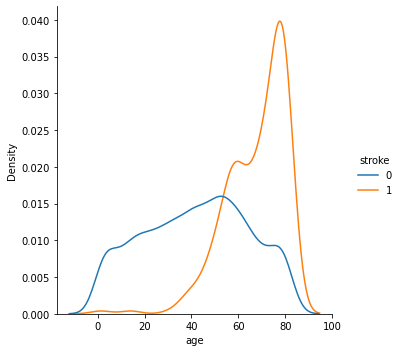

In [46]:
sns.displot(data = df,
           x = 'age',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


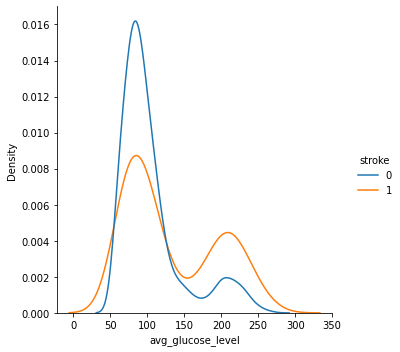

In [48]:
sns.displot(data = df,
           x = 'avg_glucose_level',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

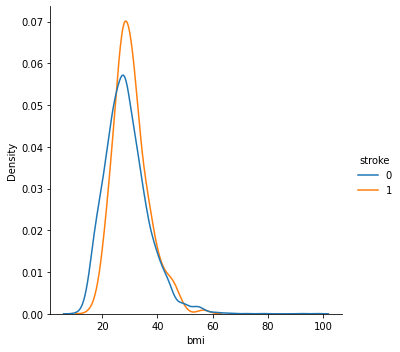

In [49]:
sns.displot(data = df,
           x = 'bmi',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

Como plotar em vários subplots?

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


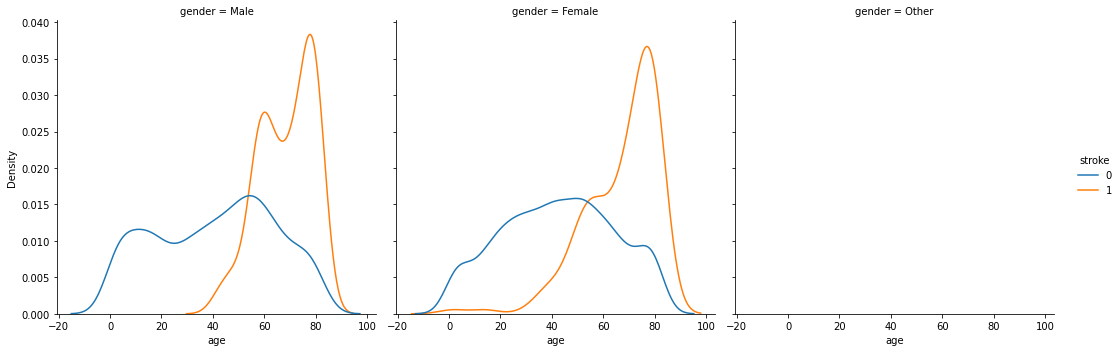

In [55]:
sns.displot(data = df,
            x = 'age',
            hue = 'stroke',
            kind = 'kde',
            col = 'gender',
            common_norm = False
)

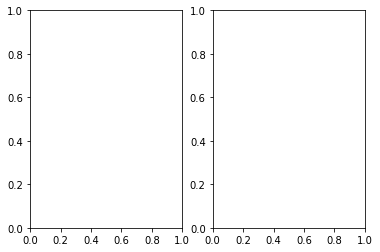

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

In [58]:
axes

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

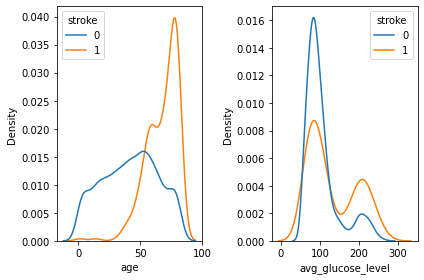

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

cols = ['age', 'avg_glucose_level']

for col, ax in zip(cols, axes):
    sns.kdeplot(data = df,
               x = col,
               hue = 'stroke',
               common_norm = False,
               ax = ax)
plt.tight_layout()

**violinplot:** plot, também, para mostrar distribuições. Combina um boxplot com o kde.

[Leitura sobre violinplot](https://mode.com/blog/violin-plot-examples/)

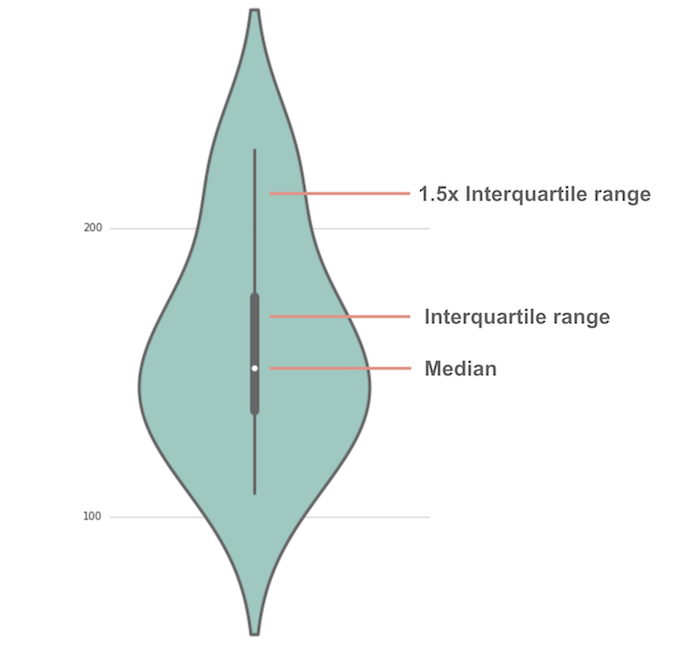  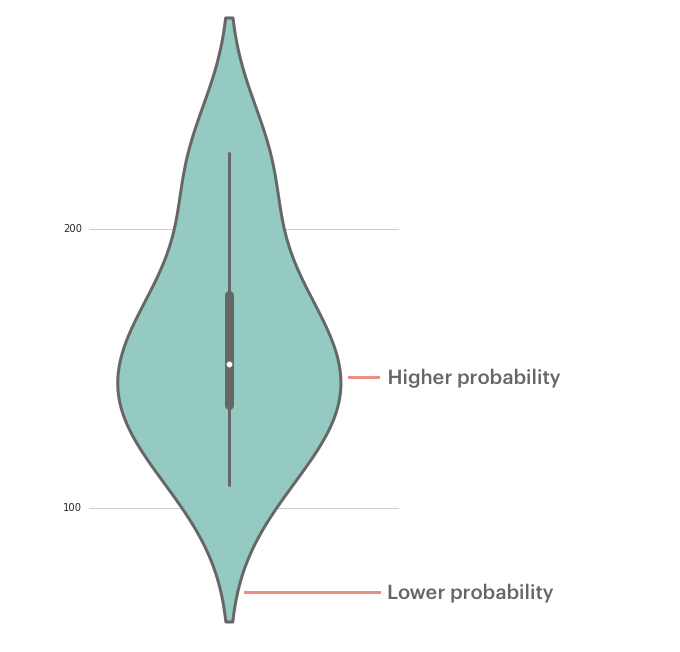

**rugplot:** plota as distribuições marginais nos eixos.

Visualizando relações entre características do dataset com **seaborn**.

A função **pairplot** sumariza as distribuições e relações entre as variáveis, par a par.

Correlação entre características

**Covariância**
Medida estatística que mensura a **variabilidade conjunta** de duas variáveis aleatórias. Intuitivamente, podemos pensar na covariância como a tendência de valores superiores de uma variável estarem, também, associados a valores maiores da outra; e vice-versa.

*Definição matemática da covariância*
$cov(X,Y) = \sum_{i=1}^{n} \frac{(x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n-1}$

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg" alt="Alternative text" />

**Correlação**
Medida estatística de dependência entre duas variáveis. Pode ser vista sob alguns tipos de metodologias.

É muito comum encontrar a ideia de correlação associada à *correlação de Pearson*, que expressa a **dependência linear** entre duas variáveis a partir de suas **covariâncias**.

Cálculo da correlação de Pearson:

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$.

<img src="https://www.scribbr.de/wp-content/uploads/2021/08/01-correlation-types-1024x415.png" alt="Alternative text" />

A correlação de Pearson **normaliza** as covariâncias no intervalo [0,1].

Vale ressaltar que *existem outras métricas de correlação*. A correlação de Spearman, por exemplo, pode capturar relações de monotonia **não-lineares** entre duas variáveis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/1200px-Spearman_fig1.svg.png" width = 400 />

## Hora de trabalhar em grupo!

Vamos fazer uma análise exploratória de dados? Utilize, para isso, a biblioteca **seaborn**, para maior familiarização com suas funções. Não se esqueça, contudo, de que você pode utilizar, inclusive, elementos de mais baixo nível da matplotlib para facilitar a customização das visualizações. Sinta-se livre para gerar as visualizações que vocês, como grupo, julgarem mais interessantes e que possam trazer alguns insights.

Desta vez, vamos passar a um dataset sobre [predição de parada cardíaca.](https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records)